In [1]:
from astropy.io import fits
from astropy.table import Table, Column, hstack
import numpy as np
import rafias_lib as rl
import pdb, glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
def get_stdev(centers1, fname1, centers2, fname2, r, r_in, r_out, ff1, ff2, rf = True, r2 = False):
    data1 = rl.time_series(centers1[1], centers1[2], fname1, r, r_in, r_out, flat_name = ff1, red = rf, red2 = r2)
    data2 = rl.time_series(centers2[1], centers2[2], fname2, r, r_in, r_out, flat_name = ff2, red = rf, red2 = r2)
    detrended_flux1 = rl.linear_bestfit(data1['time'], data1['res_flux'], 0.00002, 1)
    detrended_flux2 = rl.linear_bestfit(data2['time'], data2['res_flux'], 0.00002, 1)
    av_det_res_flux = (detrended_flux1+detrended_flux2)/2
    return (np.std(av_det_res_flux)*1e6)

In [3]:
def best_set(set_array, std_array):
    min_stdev = np.amin(std_array)
    b_set = set_array[np.argmin(std_array)]
    return b_set

In [4]:
ff_a = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits'
ff_b = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits'

In [5]:
the_type = ['MMM', 'MMP', 'MPM', 'PMM', 'PPM', 'PMP', 'MPP', 'PPP']
the_type_num = ['111', '112', '121', '211', '221', '212', '122', '222']
flats_a = [False, ff_a, False, False, False, ff_a, ff_a, ff_a]
flats_b = [False, ff_b, False, False, False, ff_b, ff_b, ff_b]

## Test 1
##### WLP8SUB

In [6]:
a11_files = []
for each in the_type:
    a11_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')))
print len(a11_files), len(a11_files[1])

8 306


In [7]:
b41_files = []
for each in the_type:
    b41_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/*.slp.fits'))[:306])
print len(b41_files), len(b41_files[1])

8 306


In [8]:
a11_centers = []
for ds, f_a in zip(a11_files, flats_a): 
    a11_centers.append(rl.gen_center_g2d(166,160,5,400,2,2,0,ds, flat_name = f_a))
print len(a11_centers), len(a11_centers[0][1])

8 306


In [9]:
b41_centers = []
for ds, f_b in zip(b41_files, flats_b): 
    b41_centers.append(rl.gen_center_g2d(162,156,5,500,2,2,0,ds, flat_name = f_b))
print len(b41_centers), len(b41_centers[0][1])

8 306


In [10]:
stdev_comparison1 = Table(names = ('Index','Stdev'))
for index, (a11, b41, a11c, b41c, f_a, f_b) in enumerate(zip(a11_files, b41_files, a11_centers, b41_centers, 
                                                             flats_a, flats_b)):
    stdev = get_stdev(a11c, a11, b41c, b41, 70, 72, 80, f_a, f_b, rf = False)
    stdev_comparison1.add_row([the_type_num[index],stdev])
stdev_comparison1

Index,Stdev
float64,float64
111.0,499.548788671
112.0,499.348855312
121.0,507.010594616
211.0,499.548788671
221.0,507.010594616
212.0,499.348855312
122.0,506.73014238
222.0,506.73014238


In [11]:
# 1 = M, 2 = P. eg. 212 = PMP
the_set1 = best_set(stdev_comparison1['Index'], stdev_comparison1['Stdev'])
the_set1

112.0

## Test 2
##### WLP8SUB640

In [12]:
a12_files = []
for each in the_type:
    a12_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8SUB640-6012195832_1_481_SE_2016-01-12T20h57m57/*.slp.fits')))
print len(a12_files), len(a12_files[1])

8 60


In [13]:
b42_files = []
for each in the_type:
    b42_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8SUB640-6012200140_1_489_SE_2016-01-12T20h58m27/*.slp.fits')))
print len(b42_files), len(b42_files[1])

8 60


In [14]:
a12_centers = []
for ds, f_a in zip(a12_files, flats_a): 
    a12_centers.append(rl.gen_center_g2d(326,320,5,400,2,2,0,ds, flat_name = f_a))
print len(a12_centers), len(a12_centers[0][1])

8 60


In [15]:
b42_centers = []
for ds, f_b in zip(b42_files, flats_b): 
    b42_centers.append(rl.gen_center_g2d(319,316,5,500,2,2,0,ds, flat_name = f_b))
print len(b42_centers), len(b42_centers[0][1])

8 60


In [16]:
stdev_comparison2 = Table(names = ('Index','Stdev'))
for index, (a12, b42, a12c, b42c, f_a, f_b) in enumerate(zip(a12_files, b42_files, a12_centers, b42_centers, 
                                                             flats_a, flats_b)):
    stdev = get_stdev(a12c, a12, b42c, b42, 70, 72, 80, f_a, f_b, rf = False)
    stdev_comparison2.add_row([the_type_num[index],stdev])
stdev_comparison2

Index,Stdev
float64,float64
111.0,1197.02728225
112.0,1196.9393218
121.0,1209.14704903
211.0,1197.02728225
221.0,1209.14704903
212.0,1196.9393218
122.0,1209.02096274
222.0,1209.02096274


In [17]:
# 1 = M, 2 = P. eg. 212 = PMP
the_set2 = best_set(stdev_comparison2['Index'], stdev_comparison2['Stdev'])
the_set2

112.0

## Test 3
##### FULLQ

In [18]:
a13_files = []
for each in the_type:
    a13_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULLQ-6013001651_1_481_SE_2016-01-13T01h03m43/*.red.fits')))
print len(a13_files), len(a13_files[1])

8 55


In [19]:
b43_files = []
for each in the_type:
    b43_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULLQ-6013002009_1_489_SE_2016-01-13T01h03m23/*.red.fits')))
print len(b43_files), len(b43_files[1])

8 55


In [20]:
a13_centers = []
for ds, f_a in zip(a13_files, flats_a): 
    a13_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, flat_name = f_a))
print len(a13_centers), len(a13_centers[0][1])

8 55


In [21]:
b43_centers = []
for ds, f_b in zip(b43_files, flats_b): 
    b43_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, flat_name = f_b))
print len(b43_centers), len(b43_centers[0][1])

8 55


In [22]:
stdev_comparison3 = Table(names = ('Index','Stdev'))
for index, (a13, b43, a13c, b43c, f_a, f_b) in enumerate(zip(a13_files, b43_files, a13_centers, b43_centers, 
                                                             flats_a, flats_b)):
    stdev = get_stdev(a13c, a13, b43c, b43, 70, 72, 80, f_a, f_b, rf = False)
    stdev_comparison3.add_row([the_type_num[index],stdev])
stdev_comparison3

Index,Stdev
float64,float64
111.0,3300.96715092
112.0,3300.96715092
121.0,3308.95769321
211.0,3300.95497982
221.0,3308.80976006
212.0,3300.95497982
122.0,3308.95769321
222.0,3308.80976006


In [23]:
# 1 = M, 2 = P. eg. 212 = PMP
the_set3 = best_set(stdev_comparison3['Index'], stdev_comparison3['Stdev'])
the_set3

211.0

## Test 4
##### FULL1

In [24]:
a14_files = []
for each in the_type:
    a14_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL1-6012051326_1_481_SE_2016-01-12T08h55m24/*.red.fits')))
print len(a14_files), len(a14_files[1])

8 225


In [25]:
b44_files = []
for each in the_type:
    b44_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL1-6012051528_1_489_SE_2016-01-12T08h30m07/*.red.fits')))
print len(b44_files), len(b44_files[1])

8 225


In [26]:
a14_centers = []
for ds, f_a in zip(a14_files, flats_a): 
    a14_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, flat_name = f_a))
print len(a14_centers), len(a14_centers[0][1])

8 225


In [27]:
b44_centers = []
for ds, f_b in zip(b44_files, flats_b): 
    b44_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, flat_name = f_b))
print len(b44_centers), len(b44_centers[0][1])

8 225


In [28]:
stdev_comparison4 = Table(names = ('Index','Stdev'))
for index, (a14, b44, a14c, b44c, f_a, f_b) in enumerate(zip(a14_files, b44_files, a14_centers, b44_centers, 
                                                             flats_a, flats_b)):
    stdev = get_stdev(a14c, a14, b44c, b44, 70, 72, 80, f_a, f_b, rf = False)
    stdev_comparison4.add_row([the_type_num[index],stdev])
stdev_comparison4

Index,Stdev
float64,float64
111.0,1935.3529893
112.0,1935.3529893
121.0,1944.80820148
211.0,1935.35138009
221.0,1944.75401475
212.0,1935.35138009
122.0,1944.80820148
222.0,1944.75401475


In [29]:
# 1 = M, 2 = P. eg. 212 = PMP
the_set4 = best_set(stdev_comparison4['Index'], stdev_comparison4['Stdev'])
the_set4

211.0

## Test 5
##### FULL2

In [30]:
a15_files = []
for each in the_type:
    a15_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL2-6012072417_1_481_SE_2016-01-12T10h40m58/*.red.fits')))
print len(a15_files), len(a15_files[1])

8 225


In [31]:
b45_files = []
for each in the_type:
    b45_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL2-6012072532_1_489_SE_2016-01-12T11h09m06/*.red.fits')))
print len(b45_files), len(b45_files[1])

8 225


In [32]:
a15_centers = []
for ds, f_a in zip(a15_files, flats_a): 
    a15_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, flat_name = f_a))
print len(a15_centers), len(a15_centers[0][1])

8 225


In [33]:
b45_centers = []
for ds, f_b in zip(b45_files, flats_b): 
    b45_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, flat_name = f_b))
print len(b45_centers), len(b45_centers[0][1])

8 225


In [34]:
stdev_comparison5 = Table(names = ('Index','Stdev'))
for index, (a15, b45, a15c, b45c, f_a, f_b) in enumerate(zip(a15_files, b45_files, a15_centers, b45_centers, 
                                                             flats_a, flats_b)):
    stdev = get_stdev(a15c, a15, b45c, b45, 70, 72, 80, f_a, f_b, rf = False)
    stdev_comparison5.add_row([the_type_num[index],stdev])
stdev_comparison5

Index,Stdev
float64,float64
111.0,2075.59175839
112.0,2075.59175839
121.0,2085.48171276
211.0,2075.7929843
221.0,2085.63599064
212.0,2075.7929843
122.0,2085.48171276
222.0,2085.63599064


In [35]:
# 1 = M, 2 = P. eg. 212 = PMP
the_set5 = best_set(stdev_comparison5['Index'], stdev_comparison5['Stdev'])
the_set5

111.0

## Test 6
##### FULL3

In [36]:
a16_files = []
for each in the_type:
    a16_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL3-6012093326_1_481_SE_2016-01-12T12h47m44/*.red.fits')))
print len(a16_files), len(a16_files[1])

8 225


In [37]:
b46_files = []
for each in the_type:
    b46_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL3-6012093432_1_489_SE_2016-01-12T12h52m21/*.red.fits')))
print len(b46_files), len(b46_files[1])

8 225


In [38]:
a16_centers = []
for ds, f_a in zip(a16_files, flats_a): 
    a16_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, flat_name = f_a))
print len(a16_centers), len(a16_centers[0][1])

8 225


In [39]:
b46_centers = []
for ds, f_b in zip(b46_files, flats_b): 
    b46_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, flat_name = f_b))
print len(b46_centers), len(b46_centers[0][1])

8 225


In [40]:
stdev_comparison6 = Table(names = ('Index','Stdev'))
for index, (a16, b46, a16c, b46c, f_a, f_b) in enumerate(zip(a16_files, b46_files, a16_centers, b46_centers, 
                                                             flats_a, flats_b)):
    stdev = get_stdev(a16c, a16, b46c, b46, 70, 72, 80, f_a, f_b, rf = False)
    stdev_comparison6.add_row([the_type_num[index],stdev])
stdev_comparison6

Index,Stdev
float64,float64
111.0,1653.49576726
112.0,1653.49576726
121.0,1655.53800533
211.0,1653.67903636
221.0,1655.66277782
212.0,1653.67903636
122.0,1655.53800533
222.0,1655.66277782


In [41]:
# 1 = M, 2 = P. eg. 212 = PMP
the_set6 = best_set(stdev_comparison6['Index'], stdev_comparison6['Stdev'])
the_set6

111.0

## Test 7
##### FULL4

In [42]:
a17_files = []
for each in the_type:
    a17_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL4-6012114105_1_481_SE_2016-01-12T14h25m53/*.red.fits')))
print len(a17_files), len(a17_files[1])

8 225


In [43]:
b47_files = []
for each in the_type:
    b47_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL4-6012114212_1_489_SE_2016-01-12T14h58m10/*.red.fits')))
print len(b47_files), len(b47_files[1])

8 225


In [44]:
a17_centers = []
for ds, f_a in zip(a17_files, flats_a): 
    a17_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, flat_name = f_a))
print len(a17_centers), len(a17_centers[0][1])

8 225


In [45]:
b47_centers = []
for ds, f_b in zip(b47_files, flats_b): 
    b47_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, flat_name = f_b))
print len(b47_centers), len(b47_centers[0][1])

8 225


In [46]:
stdev_comparison7 = Table(names = ('Index','Stdev'))
for index, (a17, b47, a17c, b47c, f_a, f_b) in enumerate(zip(a17_files, b47_files, a17_centers, b47_centers, 
                                                             flats_a, flats_b)):
    stdev = get_stdev(a17c, a17, b47c, b47, 70, 72, 80, f_a, f_b, rf = False)
    stdev_comparison7.add_row([the_type_num[index],stdev])
stdev_comparison7

Index,Stdev
float64,float64
111.0,1776.78440541
112.0,1776.78440541
121.0,1785.84302242
211.0,1776.94120985
221.0,1785.94811649
212.0,1776.94120985
122.0,1785.84302242
222.0,1785.94811649


In [47]:
# 1 = M, 2 = P. eg. 212 = PMP
the_set7 = best_set(stdev_comparison7['Index'], stdev_comparison7['Stdev'])
the_set7

111.0

## Test 8
##### FULL5

In [48]:
a18_files = []
for each in the_type:
    a18_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL5-6012184421_1_481_SE_2016-01-12T20h26m57/*.red.fits')))
print len(a18_files), len(a18_files[1])

8 110


In [49]:
b48_files = []
for each in the_type:
    b48_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL5-6012185018_1_489_SE_2016-01-12T20h20m15/*.red.fits')))
print len(b48_files), len(b48_files[1])

8 110


In [50]:
a18_centers = []
for ds, f_a in zip(a18_files, flats_a): 
    a18_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, flat_name = f_a))
print len(a18_centers), len(a18_centers[0][1])

8 110


In [51]:
b48_centers = []
for ds, f_b in zip(b48_files, flats_b): 
    b48_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, flat_name = f_b))
print len(b48_centers), len(b48_centers[0][1])

8 110


In [52]:
stdev_comparison8 = Table(names = ('Index','Stdev'))
for index, (a18, b48, a18c, b48c, f_a, f_b) in enumerate(zip(a18_files, b48_files, a18_centers, b48_centers, 
                                                             flats_a, flats_b)):
    stdev = get_stdev(a18c, a18, b48c, b48, 70, 72, 80, f_a, f_b, rf = False)
    stdev_comparison8.add_row([the_type_num[index],stdev])
stdev_comparison8

Index,Stdev
float64,float64
111.0,1976.89374963
112.0,1976.89374963
121.0,1982.53528391
211.0,1977.03299761
221.0,1982.58218978
212.0,1977.03299761
122.0,1982.53528391
222.0,1982.58218978


In [53]:
# 1 = M, 2 = P. eg. 212 = PMP
the_set8 = best_set(stdev_comparison8['Index'], stdev_comparison8['Stdev'])
the_set8

111.0

## Results

In [66]:
result_table = Table(names = ('Test Name', 'WLP8SUB', 'WLP8SUB640', 'FULLQ', 'FULL1', 'FULL2', 'FULL3','FULL4', 'FULL5'), 
                     dtype=('S4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4'))

# #initializing variables
# tests = ['WLP8SUB', 'WLP8SUB640', 'FULLQ', 'FULL1', 'FULL2', 'FULL3','FULL4', 'FULL5']
# table_names = []
# for index, x in enumerate(range(1,9)):
#     table_names.append(globals()['stdev_comparison%s' % x])

# #creating the actual table
# result_table['Test Name'] = the_type
# for index, test in enumerate(tests):
#     result_table[test] = table_names[index]['Stdev']
# result_table

for i in range(8):
#     pdb.set_trace()
    result_table.add_row([the_type[i], stdev_comparison1[i]['Stdev'], stdev_comparison2[i]['Stdev'], stdev_comparison3[i]['Stdev'], 
                          stdev_comparison4[i]['Stdev'], stdev_comparison5[i]['Stdev'], stdev_comparison6[i]['Stdev'], 
                          stdev_comparison7[i]['Stdev'], stdev_comparison8[i]['Stdev']])
result_table

Test Name,WLP8SUB,WLP8SUB640,FULLQ,FULL1,FULL2,FULL3,FULL4,FULL5
str4,float32,float32,float32,float32,float32,float32,float32,float32
MMM,499.549,1197.03,3300.97,1935.35,2075.59,1653.5,1776.78,1976.89
MMP,499.349,1196.94,3300.97,1935.35,2075.59,1653.5,1776.78,1976.89
MPM,507.011,1209.15,3308.96,1944.81,2085.48,1655.54,1785.84,1982.54
PMM,499.549,1197.03,3300.96,1935.35,2075.79,1653.68,1776.94,1977.03
PPM,507.011,1209.15,3308.81,1944.75,2085.64,1655.66,1785.95,1982.58
PMP,499.349,1196.94,3300.96,1935.35,2075.79,1653.68,1776.94,1977.03
MPP,506.73,1209.02,3308.96,1944.81,2085.48,1655.54,1785.84,1982.54
PPP,506.73,1209.02,3308.81,1944.75,2085.64,1655.66,1785.95,1982.58


In [67]:
result_table.write('full_MP_stdev.tex', format = 'latex')

In [56]:
table_names2 = []
for x in range(1,9):
    table_names2.append(globals()['the_set%s' % x])
# Printing out results
for index, test in enumerate(tests):
    print '%s : %s' % (test, table_names2[index])

WLP8SUB : 112.0
WLP8SUB640 : 112.0
FULLQ : 211.0
FULL1 : 211.0
FULL2 : 111.0
FULL3 : 111.0
FULL4 : 111.0
FULL5 : 111.0


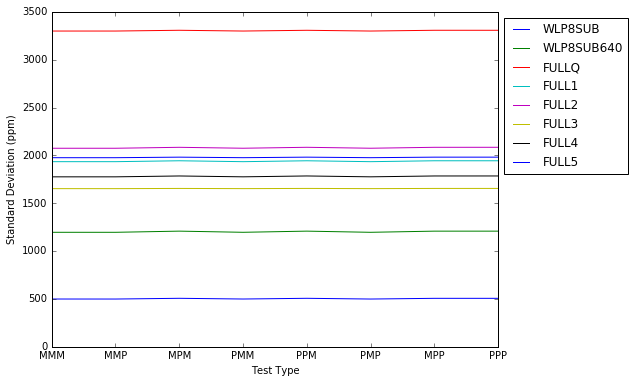

In [57]:
for i, test in enumerate(tests):
    x = [1,2,3,4,5,6,7,8]
    plt.plot(x, result_table[test], label = test)
    plt.xticks(x, the_type)
    plt.xlabel('Test Type')
    plt.ylabel('Standard Deviation (ppm)')
    plt.legend(loc = 'best', bbox_to_anchor = (1,1))